___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Vitor Pereira

## Rafael Almada



___

## INTRODUÇÃO

O objetivo do projeto é criar um modelo preditivo conduzido por uma análise de dados a partir de um dataset escolhido, e a partir de variáveis qualitativas e quantitativas correlacionadas, estimar o valor de uma variável qualitativa. Para tanto nós decidimos fazer uma análise preditiva da variável quantitativa "renda", baseando-se no uso da PNAD 2015 (dataset utilizado no projeto 1), utilizando as variáveis explicativas que a dupla julgou relevantes: Região de nascimento, sexo, idade, cor ou raça, grau de alfabetização, e rendimento domiciliar per capita no mês da pesquisa. 
Dadas essas variaveis pretendemos analisar a partir de uma regressão linear, a dispersão dessas variáveis explicativas em relação a renda, ou seja, o quanto essas variáveis selecionadas se relacionam com a renda de uma pessoa que respondeu a pesquisa. Feita a regressão linear vamos comparar os valores obtidos de renda à renda real de pessoas aleatórias para validar a qualidade da predição. 

___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

[Detalhe aqui as características da base de dados além da análise descritiva.]

In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
import math as math
from scipy import stats
import statsmodels.api as sm

In [27]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

valores=pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')


dados=pd.DataFrame({

    'Estado' :valores.UF,
    'Sexo' :valores.V0302,
    'Idade' :valores.V8005,
    'Cor_ou_raca':valores.V0404,
    'Sabe_ler_e_escrever' :valores.V0601,
    'renda' :valores.V4720,
    'Rendimento_mensal_domiciliar_per_capita' :valores.V4742
    })



dados=dados[['Estado','Sexo','Idade','Cor_ou_raca','Sabe_ler_e_escrever','renda','Rendimento_mensal_domiciliar_per_capita']]


dados.Sexo=dados.Sexo.astype('category')
dados.Sexo.cat.categories=(['Masculino','Feminino'])

dados.Cor_ou_raca=dados.Cor_ou_raca.astype('category')
dados.Cor_ou_raca.cat.categories=(['Branca','Preta','Amarela','Parda','Indígena','Sem declaração'])

dados.Sabe_ler_e_escrever=dados.Sabe_ler_e_escrever.astype('category')
dados.Sabe_ler_e_escrever.cat.categories=('Sim','Não')

dados.Rendimento_mensal_domiciliar_per_capita=dados.Rendimento_mensal_domiciliar_per_capita.round(1)

def Estados(linha):
    if linha>=11 and linha<=17:
        return 'Norte'
    if linha>=21 and linha<=29:
        return 'Nordeste'
    if linha>=31 and linha<=35:
        return 'Sudeste'
    if linha>=41 and linha<=43:
        return 'Sul'
    if linha>=50 and linha<=53:
        return 'Centro-Oeste'
    
dados.Estado=dados.Estado.apply(Estados)

#dados=dados.dropna()

#dados=dados[['renda']]

#dados
#.rendimento.mean()

Esperamos trabalhar no diretório
C:\Users\Samuel\Desktop\projeto3cddp-master\projeto3cddp-master


### BASE DE DADOS

In [28]:
dados

,Estado,Sexo,Idade,Cor_ou_raca,Sabe_ler_e_escrever,renda,Rendimento_mensal_domiciliar_per_capita
0,Norte,Masculino,23,Indígena,Sim,800.0,8.000000e+02
1,Norte,Feminino,23,Preta,Sim,1150.0,1.150000e+03
2,Norte,Feminino,35,Indígena,Sim,880.0,7.930000e+02
3,Norte,Masculino,34,Indígena,Sim,3000.0,7.930000e+02
4,Norte,Feminino,11,Indígena,Sim,0.0,7.930000e+02
5,Norte,Feminino,7,Indígena,Sim,NaN,7.930000e+02
6,Norte,Feminino,4,Indígena,Não,NaN,7.930000e+02
7,Norte,Feminino,18,Indígena,Sim,880.0,7.930000e+02
8,Norte,Masculino,46,Preta,Sim,3500.0,2.900000e+03
9,Norte,Feminino,81,Indígena,Sim,2300.0,2.900000e+03


### ANÁLISE DESCRITIVA

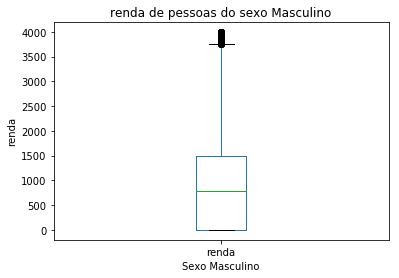

In [29]:
dados=dados[dados.renda<4000]

BoxMasc=dados[(dados.Sexo == "Masculino")]
BoxFem=dados[(dados.Sexo == "Feminino")]

plot = BoxMasc.renda.plot(kind='box',title='.')#, color='red')

plt.ylabel('renda')
plt.xlabel('Sexo Masculino')
plt.title('renda de pessoas do sexo Masculino')
plt.show()



In [30]:
BoxMasc.describe()

,Idade,renda,Rendimento_mensal_domiciliar_per_capita
count,135776.000000,135776.000000,1.355600e+05
mean,36.806453,950.187146,1.096194e+10
std,18.770094,881.788604,1.041242e+11
min,10.000000,0.000000,0.000000e+00
25%,21.000000,0.000000,3.790000e+02
50%,34.000000,788.000000,6.620000e+02
75%,50.000000,1500.000000,1.060000e+03
max,107.000000,3991.000000,1.000000e+12


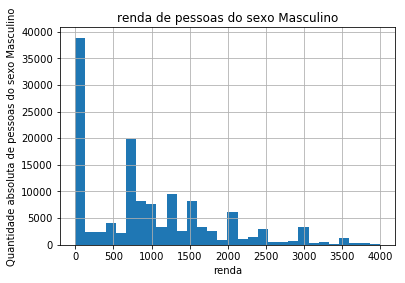

In [31]:
BoxMasc.hist(column="renda",bins=30)
plt.ylabel('Quantidade absoluta de pessoas do sexo Masculino')
plt.xlabel('renda')
plt.title('renda de pessoas do sexo Masculino')

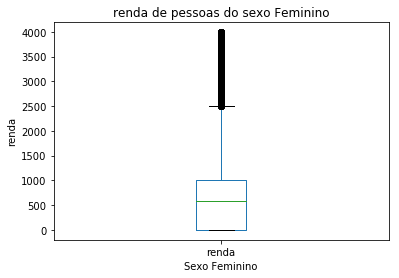

In [32]:
plot = BoxFem.renda.plot(kind='box',title='.')#, color='red')

plt.ylabel('renda')
plt.xlabel('Sexo Feminino')
plt.title('renda de pessoas do sexo Feminino')
plt.show()

In [33]:
BoxFem.describe()

,Idade,renda,Rendimento_mensal_domiciliar_per_capita
count,152513.000000,152513.000000,1.521990e+05
mean,39.151594,670.510901,1.355462e+10
std,19.244465,771.069458,1.156330e+11
min,10.000000,0.000000,0.000000e+00
25%,23.000000,0.000000,3.790000e+02
50%,37.000000,580.000000,6.670000e+02
75%,53.000000,1000.000000,1.121000e+03
max,115.000000,3992.000000,1.000000e+12


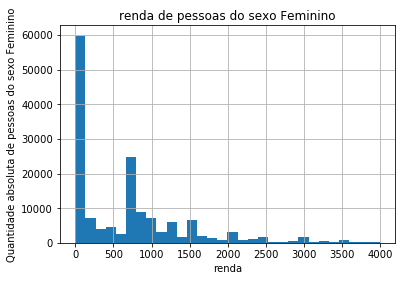

In [34]:
BoxFem.hist(column="renda",bins=30)
plt.ylabel('Quantidade absoluta de pessoas do sexo Feminino')
plt.xlabel('renda')
plt.title('renda de pessoas do sexo Feminino')

___
## MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

o MODELO DE PREDIÇÃO PELA MÉDIA

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

___
## Validação cruzada:

In [35]:
#divisao teste e treinamento x 10
from sklearn.model_selection import train_test_split

for i in range (10):
    dados_treino, dados_teste = train_test_split(dados,test_size=0.1)
    
dados_treino.head(5)

,Estado,Sexo,Idade,Cor_ou_raca,Sabe_ler_e_escrever,renda,Rendimento_mensal_domiciliar_per_capita
133734,Nordeste,Masculino,24,Indígena,Sim,277.0,277.0
285665,Sul,Feminino,70,Preta,Sim,1749.0,1149.0
27243,Norte,Feminino,43,Amarela,Sim,0.0,500.0
221130,Sudeste,Masculino,51,Indígena,Sim,3000.0,2200.0
52204,Norte,Masculino,33,Preta,Sim,1500.0,375.0


___
## MODELO DE PREDIÇÃO PELA MÉDIA:

In [36]:
Media_renda=dados_treino.renda.mean()
Media_renda

#print(len(dados_treino))

802.5773568180066

___
## R2

In [37]:
Somatoria1=0
Somatoria2=0

for i in range(len(dados_treino)):
    A1=(dados_treino.renda.iloc[i]-Media_renda)**2
    Somatoria1+=A1
    A2=(dados_treino.renda.iloc[i]-Media_renda)**2
    Somatoria2+=A2
    
R2= 1-(Somatoria1/Somatoria2)
R2

0.0

___
## RMS

In [38]:
Somatoria3=0

for i in range(len(dados_treino)):
    A1=(dados_treino.renda.iloc[i]-Media_renda)**2
    Somatoria3+=A1
    
    
RMS=((Somatoria3)**(1/2))/len(dados_treino)
RMS

1.6430637022695507

___
## MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression):

In [39]:
ListaVi=0

for j in range (1,30):
    for i in range(j):
        Vi=dados_treino.renda.iloc[i]-dados_treino.renda.mean()
        ListaVi+=(Vi)  
    MediaVi=(ListaVi/j)
    print("para {0} vizinhos, a variação da renda de cada indivíduo para a média de renda é de: {1}".format(j,MediaVi))


para 1 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: -525.5773568180066
para 2 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: -52.36603522700989
para 3 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: -162.15471363601318
para 4 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: 332.3066079549835
para 5 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: 768.4679295459803
para 6 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: 925.4792511369769
para 7 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: 1051.5477155851165
para 8 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: 1195.7768943189703
para 9 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: 1218.7798825766338
para 10 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: 

___
## MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression):

In [67]:
valores2=pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')


dados_regressao=pd.DataFrame({

    'Estado' :valores2.UF,
    'Sexo' :valores2.V0302,
    'Idade' :valores2.V8005,
    'Cor_ou_raca':valores2.V0404,
    'Sabe_ler_e_escrever' :valores2.V0601,
    'renda' :valores2.V4720,
    'Rendimento_mensal_domiciliar_per_capita' :valores2.V4742
    })



dados_regressao=dados_regressao[['Estado','Sexo','Idade','Cor_ou_raca','Sabe_ler_e_escrever','renda','Rendimento_mensal_domiciliar_per_capita']]

dados_regressao['Rendimento_mensal_domiciliar_per_capita']=(dados_regressao['Rendimento_mensal_domiciliar_per_capita']).fillna(0.0).astype(int)

dados_regressao=dados_regressao[dados_regressao.renda<40000]

dados_regressao=dados_regressao[dados_regressao.Rendimento_mensal_domiciliar_per_capita<40000]

dados_regressao=dados_regressao[dados_regressao.Rendimento_mensal_domiciliar_per_capita>-1]


for i in range (10):
    dados_regressao_treino, dados_regressao_teste = train_test_split(dados_regressao,test_size=0.1)
    
dados_regressao_treino.head(10)

,Estado,Sexo,Idade,Cor_ou_raca,Sabe_ler_e_escrever,renda,Rendimento_mensal_domiciliar_per_capita
232653,35,2,61,8,1,790.0,895
333821,52,4,53,2,1,788.0,589
258054,35,2,33,8,1,1300.0,2650
40659,15,4,60,2,1,788.0,422
335923,52,2,39,2,1,5000.0,1929
181112,31,2,32,2,1,800.0,200
263325,35,4,60,8,1,800.0,900
178641,31,2,68,2,3,788.0,788
143476,29,2,35,8,1,1500.0,762
282337,41,4,29,2,1,0.0,300


Para a realização da predição é importante que as variaveis não estejam em formato texto, por isso foi utilizado novamente o dataset mas dessa vez sem converter as variaveis para formato texto.

In [41]:
Variaveis_Independentes_treino=dados_regressao_treino.iloc[0:,[0,1,2,3,4,6]].values
Variavel_Dependente_treino=dados_regressao_treino.iloc[0:,[5]].values
Variaveis_Independentes_teste=dados_regressao_teste.iloc[0:,[0,1,2,3,4,6]].values
Variavel_Dependente_teste=dados_regressao_teste.iloc[0:,[5]].values

Nessa parte do código, as colunas das variáveis que serão usadas para prever a renda (Estado, Sexo, Idade, Cor_ou_raca, Sabe_ler_e_escrever, renda, Rendimento_mensal_domiciliar_per_capita) são armazenadas na variável Variaveis_Independentes. E a coluna da variável a ser prevista é armazenada na variável Variavel_Dependente.
Cada uma delas sendo divididas nas vertentes teste e treinamento.

In [42]:
Variaveis_Independentes_treino

array([[  21,    2,   63,    2,    1,  302],
       [  15,    2,   29,    8,    1,  744],
       [  12,    4,   14,    2,    1,  138],
       ..., 
       [  22,    2,   10,    8,    1,  262],
       [  26,    4,   20,    2,    1,  633],
       [  43,    2,   72,    8,    1, 1540]], dtype=int64)

In [43]:
Variavel_Dependente_treino

array([[  420.],
       [  700.],
       [    0.],
       ..., 
       [    0.],
       [  112.],
       [ 2000.]])

In [44]:
from sklearn.linear_model import LinearRegression

In [59]:
Regressao=LinearRegression()
regfit=Regressao.fit(Variaveis_Independentes_treino,Variavel_Dependente_treino)
renda_prevista=Regressao.predict(Variaveis_Independentes_teste)
renda_prevista


array([[ -115.96755646],
       [  742.44142953],
       [  731.71675813],
       ..., 
       [ 1391.43050781],
       [  -48.80431952],
       [   53.96209641]])

___
## R2

In [46]:
#print (len (renda_prevista))
#print (len (Variaveis_Independentes_treino))
#print (len (Variaveis_Independentes_teste))
#print(dados_regressao_teste.renda.mean())

Somatoria1=0
Somatoria2=0

for i in range (len(Variaveis_Independentes_teste)):
    A1=(dados_regressao_teste.renda.iloc[i]-renda_prevista[i])**2
    Somatoria1+=A1
    A2=(dados_regressao_teste.renda.iloc[i]-dados_regressao_teste.renda.mean())**2
    Somatoria2+=A2
    
R2= 1-(Somatoria1/Somatoria2)
R2




array([ 0.54767094])

___
## RMS

In [47]:
Somatoria3=0


for i in range (len(renda_prevista)):
    A1=(dados_regressao_teste.renda.iloc[i]-renda_prevista[i])**2
    Somatoria3+=A1
    
RMS=((Somatoria3)**(1/2))/len(renda_prevista)
RMS


array([ 8.19896488])

In [79]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

x=Variaveis_Independentes_treino
y=Variavel_Dependente_treino

olsmod = sm.OLS(y,x)
olres = olsmod.fit()
print(olres.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                 8.944e+04
Date:                Mon, 04 Jun 2018   Prob (F-statistic):               0.00
Time:                        20:37:23   Log-Likelihood:            -2.3545e+06
No. Observations:              271690   AIC:                         4.709e+06
Df Residuals:                  271684   BIC:                         4.709e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.5087      0.206     26.755      0.0

30188
30188


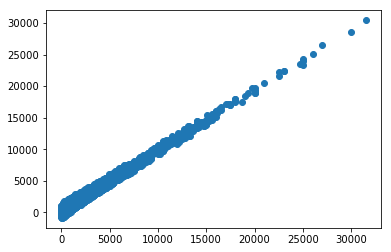

In [78]:
print(len(Variaveis_Independentes_teste[:,0]))
print(len(renda_prevista))
plt.scatter(Variaveis_Independentes_teste[:,5],renda_prevista)
plt.show()

___
## CONCLUSÃO

___
## REFERÊNCIAS BIBLIOGRÁFICAS